

**Question 1:** 
Remove all records with a smoking status of 'unknown'.

Create a heatmap crosstab that shows the *observed* counts of the stroke (yes or no) by smoking status. 

How many people have NOT had a stroke that have never smoked? Round to the nearest whole number (integer).

**1,768 people that have never smoked have not had a stroke**



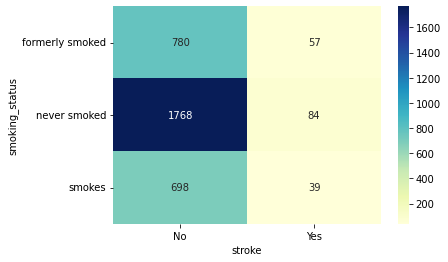

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import norm
import math

df = pd.read_csv('https://www.dropbox.com/s/m7cuv5yw9o2cvps/healthcare-dataset-stroke-data-cat.csv?dl=1')
df = df[df['smoking_status'] != 'Unknown']

sns.heatmap(pd.crosstab([df.smoking_status],[df.stroke], normalize = False), annot = True, fmt = 'g', cbar = True, cmap = 'YlGnBu')

#sns.heatmap(pd.crosstab([df.smoking_status],[df.stroke]), cmap = "YlGnBu", annot = True, cbar = False, normalize = '')#

**Question 2:** 

Using the information from question 1, how many people have had a stroke that smoke? Round to the nearest whole number (integer).

**39 people with a Smoking Status of "smokes" have had a stroke**

In [ ]:
df[(df['smoking_status'] == 'smokes') & (df['stroke'] == 'Yes')].count()

#df_q2 = df[(df['smoking_status'] == 'smokes') & (df['stroke'] == 'Yes')]
#df_q2.count()


gender               39
age                  39
hypertension         39
heart_disease        39
ever_married         39
work_type            39
Residence_type       39
avg_glucose_level    39
bmi                  39
smoking_status       39
stroke               39
dtype: int64

**Question 3:** 

Using the information in question #1, create a heatmap crosstab that shows the *expected* counts of stroke (yes or no) by smoking status.

How many people are expected to have NOT had a stroke that have never smoked? Round to the nearest integer (whole number).

**1,755 of people that have never smoked are expected to have NOT had a stroke**



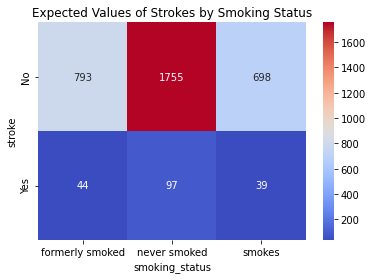

In [ ]:
crosstab = pd.crosstab(index = df['stroke'], columns = df['smoking_status'])

x, p, dof, expected_values = chi2_contingency(crosstab)

ev_df = pd.DataFrame(np.rint(expected_values).astype('int64'), columns=crosstab.columns, index = crosstab.index )

sns.heatmap(ev_df, annot=True, fmt='d', cmap='coolwarm')

plt.title('Expected Values of Strokes by Smoking Status')

plt.show()

**Question #4:** 

Using the information in question #3, how many people are expected to have had a stroke that smoke? Round to the nearest integer (whole number).

**39 people that smoke are expected to have had a stroke.**

In [ ]:
x, p, dof, expected_values = chi2_contingency(crosstab)

print('chi-square: ' + str(round(x,5)))
print('p-value: ' + str(round(p, 5)))

chi-square: 5.99319
p-value: 0.04996


**Question #5**

Using the information in questions 1-4, is there an association between if a person has had a stroke and their smoking status? Hint: round the p-value to 5 decimal places.

**Yes, there is a statistically significant relationship between the variables because the p-value is less than 0.05.**

In [ ]:
x, p, dof, expected_values = chi2_contingency(crosstab)

print('chi-square: ' + str(round(x,5)))
print('p-value: ' + str(round(p, 5)))


chi-square: 5.99319
p-value: 0.04996


**Question #6** 

Using the information in questions 1-5, what is the effect size of a person's smoking status and if they have had a stroke? Round to 4 decimal places.

**The effect size (chi-square) is 5.9932.**

In [ ]:
print('chi-square: ' + str(round(x,4)))

chi-square: 5.9932


**Question #7**

Filter the dataframe to only include those age 35 or older 
*and* with a private job or self employeed job. You should still not include records with a smoking status of 'Unknown'.

Create a crosstab that shows the observed counts of the stroke (yes or no) by work type.

What group has the lowest observed count? **People who are self-employed and have had a stroke are the group with the lowest observed count at 48.**

In [ ]:
df_q7 = df[(df['age'] >= 35) & (df['smoking_status'] != 'Unknown') & ((df['work_type'] == 'Private') | (df['work_type'] == 'Self-employed'))]
crosstab_q7 = pd.crosstab(index = df_q7['stroke'], columns = df_q7['work_type'])
crosstab_q7

work_type,Private,Self-employed
stroke,,
No,1403,529
Yes,108,48


**Question #8**

Using information from question 7, is there an association between if a person has had a stroke and their work_type? 

**There is not an association between if a person has had a stroke and their work_type because the p-value is greater than 0.05 (0.41379).**

In [ ]:
x, p, dof, expected_values = chi2_contingency(crosstab_q7)

print('chi-square: ' + str(round(x,5)))
print('p-value: ' + str(round(p, 5)))

chi-square: 0.66789
p-value: 0.41379


**Question #9**

Create a function that will accept a dataframe, an index and column. The function should create a crosstab heat map of observed values. The function should also print out the chi-square and p-value of the index and column. 

A TA will manually grade this question by passing to the function a new dataframe, index and column. 

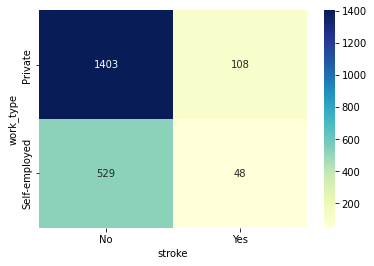

chi-square: 0.66789
p-value: 0.41379


In [ ]:
def alex_is_the_worst(df_inp, ind, col):

  df = df_inp
  
  crosstab = pd.crosstab(index = df[ind], columns = df[col]) #this is probably wrong

  x, p, dof, expected_values = chi2_contingency(crosstab)
  
  sns.heatmap(pd.crosstab([df[ind]],[df[col]], normalize = False), annot = True, fmt = 'g', cbar = True, cmap = 'YlGnBu')

  plt.show()

  print('chi-square: ' + str(round(x,5)))
  print('p-value: ' + str(round(p, 5)))

alex_is_the_worst(df_q7, 'work_type', 'stroke')